In [1]:
#EXPORTAMOS LAS BIBLOTECAS QUE VAMOS A UTILIZAR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CARGAMOS EL CSV QUE VAMOS A UTILIZAR
Update_homicidios = pd.read_csv("C:\\Users\\Dr-Pc\\OneDrive\\Escritorio\\PROYECTO INDIVIDUAL N°2 Siniestros Viales\\Siniestros viales\\Update_homicidios.csv")

In [3]:
#AGREGAMOS UNA COLUMAN QUE CUMPLA EL ROL DEL ID 
Update_homicidios['ID'] = range(1, len(Update_homicidios) + 1)

In [4]:
#ELIMINAMOS A COLUMNA UNNAMED
def clean_data(Update_homicidios):
    # Drop column: 'Unnamed: 0'
    Update_homicidios = Update_homicidios.drop(columns=['Unnamed: 0'])
    return Update_homicidios

Update_homicidios = clean_data(Update_homicidios.copy())
Update_homicidios.head(2)

,ID_hecho,N_VICTIMAS,FECHA DEL SINIESTRO,AÑO,HORA_DEL_SINIESTRO,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),...,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE,ID
0,2016-0001,1,2016-01-01,2016,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),...,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,1,1
1,2016-0002,1,2016-01-02,2016,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),...,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,1,2


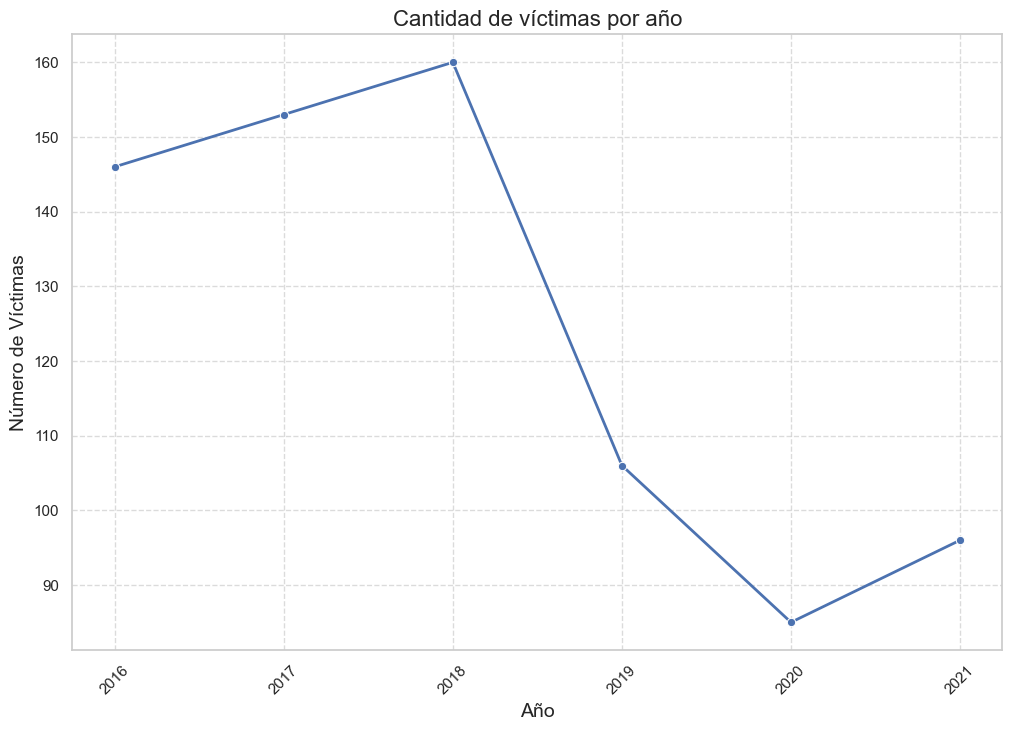

In [5]:
# Convertir la columna 'FECHA DEL SINIESTRO' a datetime
Update_homicidios['FECHA DEL SINIESTRO'] = pd.to_datetime(Update_homicidios['FECHA DEL SINIESTRO'])

# Extraer el año de la fecha
Update_homicidios['Year'] = Update_homicidios['FECHA DEL SINIESTRO'].dt.year

# Agrupar por año y sumar la cantidad de víctimas
grouped = Update_homicidios.groupby('Year')['N_VICTIMAS'].sum().reset_index()

# Crear el gráfico de líneas utilizando Seaborn para un estilo más atractivo
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(x='Year', y='N_VICTIMAS', data=grouped, marker='o', color='b', linewidth=2)

# Personalizar el gráfico
plt.title('Cantidad de víctimas por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Víctimas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

C:\Users\Dr-Pc\AppData\Local\Temp\ipykernel_2620\669623390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped, palette="viridis")


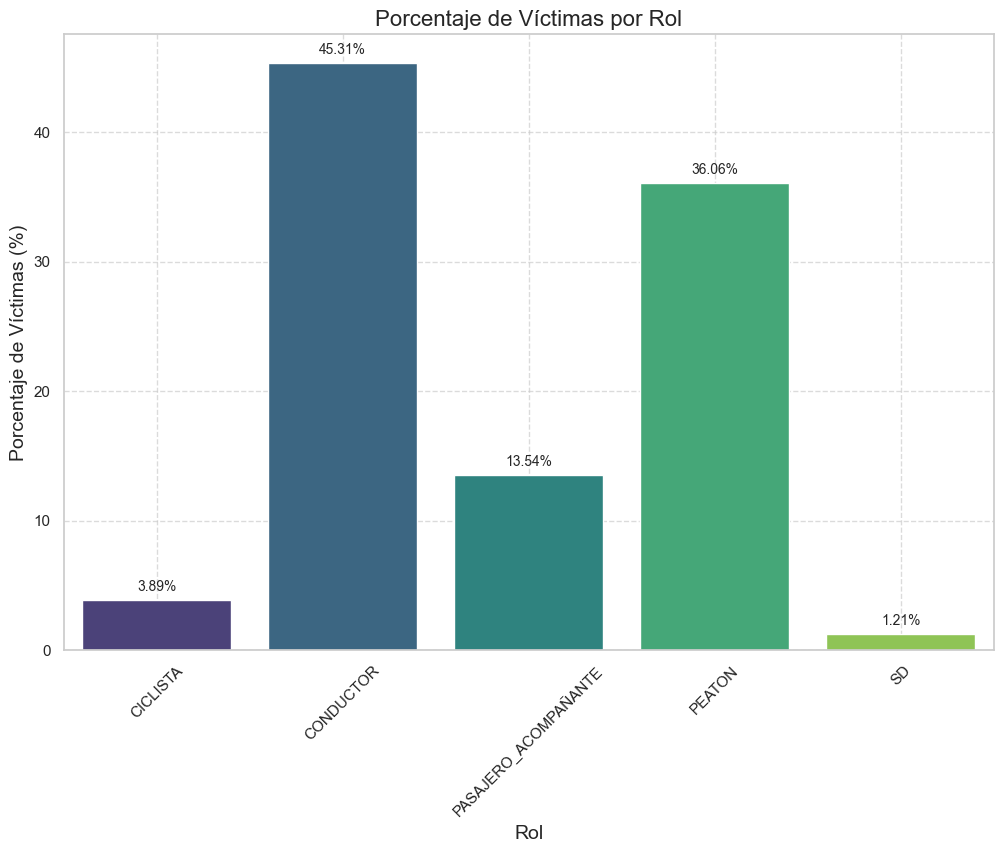

In [6]:
# Calcular el total de N_VICTIMAS
total_victimas = Update_homicidios['N_VICTIMAS'].sum()

# Agrupar por ROL y calcular la suma de N_VICTIMAS para cada ROL
grouped = Update_homicidios.groupby('ROL')['N_VICTIMAS'].sum()

# Calcular el porcentaje de N_VICTIMAS para cada ROL
grouped_percentage = grouped / total_victimas * 100

# Convertir la serie en un DataFrame
df_grouped = grouped_percentage.reset_index()

# Crear el gráfico de barras utilizando Seaborn para un estilo más atractivo
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped, palette="viridis")

# Personalizar el gráfico
plt.title('Porcentaje de Víctimas por Rol', fontsize=16)
plt.xlabel('Rol', fontsize=14)
plt.ylabel('Porcentaje de Víctimas (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas con el porcentaje en cada barra
for index, value in enumerate(df_grouped['N_VICTIMAS']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

C:\Users\Dr-Pc\AppData\Local\Temp\ipykernel_2620\95696254.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEXO', y='N_VICTIMAS', data=df_grouped, palette="muted")


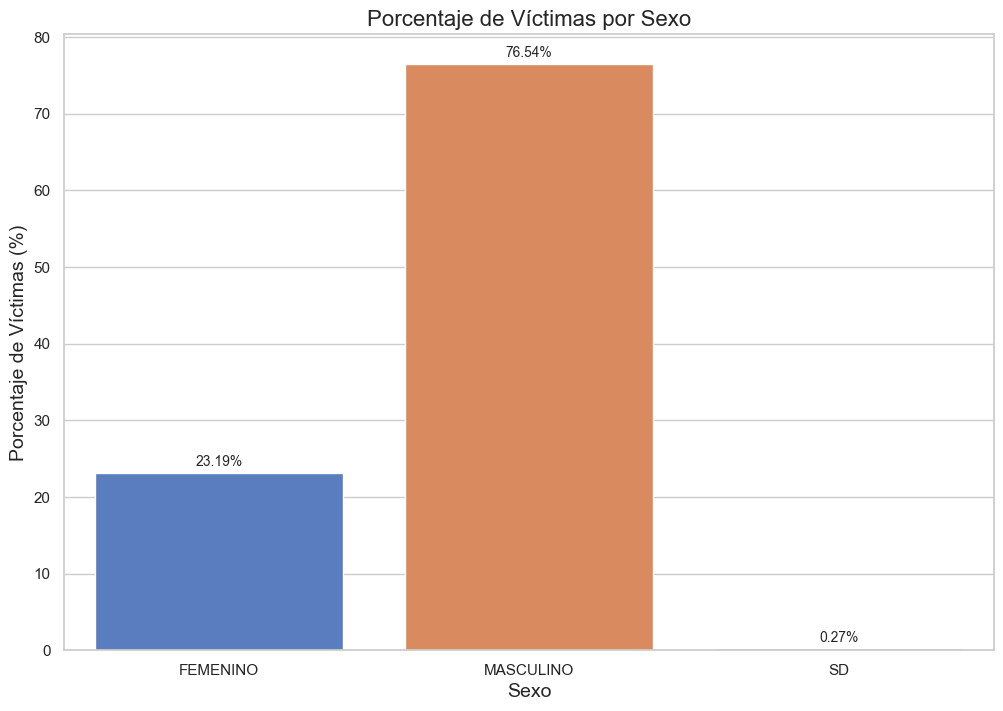

In [7]:
# Calcular el total de VICTIMAS
total_victimas = Update_homicidios['N_VICTIMAS'].sum()

# Agrupar por SEXO y calcular la suma de N_VICTIMAS para cada SEXO
grouped = Update_homicidios.groupby('SEXO')['N_VICTIMAS'].sum()

# Calcular el porcentaje de N_VICTIMAS para cada SEXO
grouped_percentage = grouped / total_victimas * 100

# Convertir la serie en un DataFrame
df_grouped = grouped_percentage.reset_index()

# Crear el gráfico de barras utilizando Seaborn para un estilo más atractivo
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='SEXO', y='N_VICTIMAS', data=df_grouped, palette="muted")

# Personalizar el gráfico
plt.title('Porcentaje de Víctimas por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Porcentaje de Víctimas (%)', fontsize=14)
plt.xticks(rotation=0)  # No rotar las etiquetas en este caso

# Añadir etiquetas con el porcentaje en cada barra
for index, value in enumerate(df_grouped['N_VICTIMAS']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

In [8]:
# Convertir la columna 'EDAD' a numérica, ignorando los errores (coerce)
Update_homicidios['EDAD'] = pd.to_numeric(Update_homicidios['EDAD'], errors='coerce')

# Creamos los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]  # Ajusté los límites para incluir 100-110
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']
Update_homicidios['Rango_Edad'] = pd.cut(Update_homicidios['EDAD'], bins=bins, labels=labels, right=False)


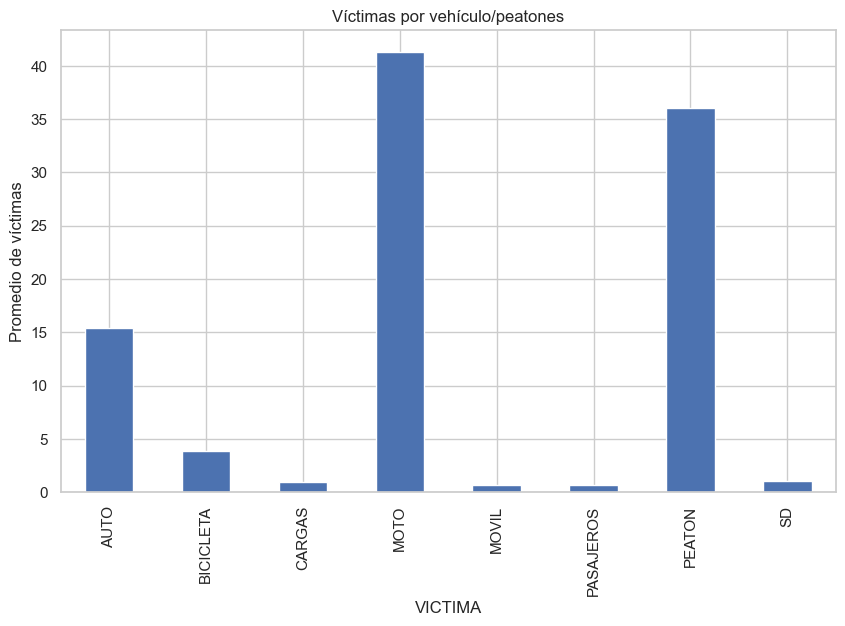

In [9]:
# Creamos el segundo gráfico: Porcentaje de N_VICTIMAS por VICTIMA
plt.figure(figsize=(10,6))
(Update_homicidios.groupby('VICTIMA')['N_VICTIMAS'].sum() / Update_homicidios['N_VICTIMAS'].sum() * 100).plot(kind='bar')
plt.xlabel('VICTIMA')
plt.ylabel('Promedio de víctimas')
plt.title('Víctimas por vehículo/peatones')
plt.show()

<Figure size 1000x600 with 0 Axes>

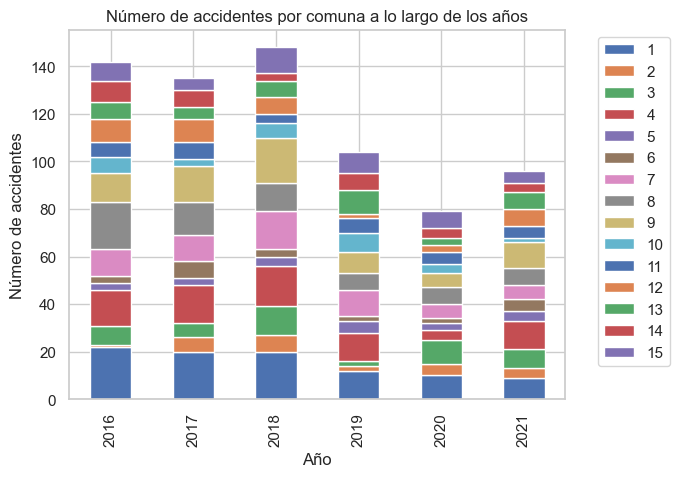

In [10]:
# Convertir la columna 'FECHA_SINIESTRO' a datetime
Update_homicidios['FECHA DEL SINIESTRO'] = pd.to_datetime(Update_homicidios['FECHA DEL SINIESTRO'])

# Extraer el año de la fecha
Update_homicidios['Year'] = Update_homicidios['FECHA DEL SINIESTRO'].dt.year

# Agrupar por año y comuna y contar el número de accidentes
grouped = Update_homicidios.groupby(['Year', 'COMUNA']).size()

# Desapilar el DataFrame agrupado para tener una columna por comuna
grouped = grouped.unstack()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por comuna a lo largo de los años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


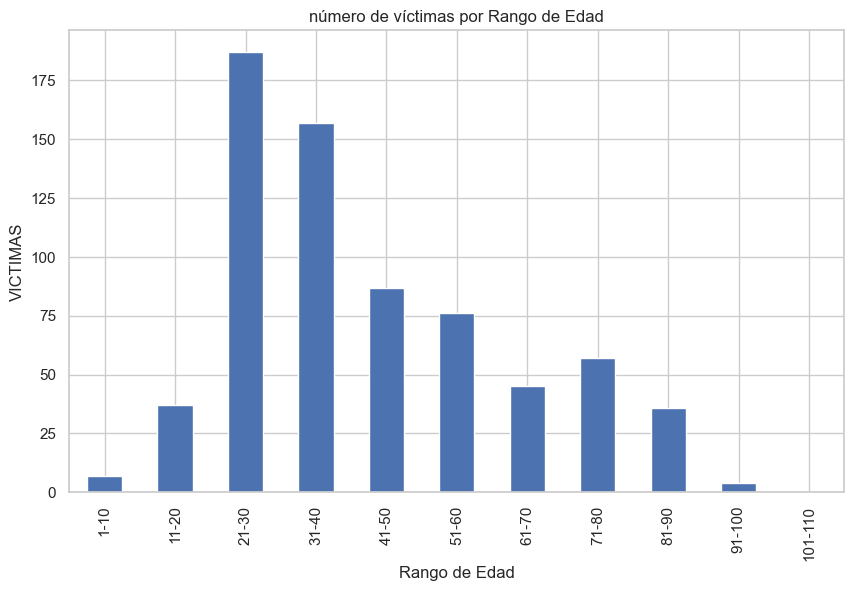

In [11]:
# Creamos el primer gráfico: N_VICTIMAS por Rango_Edad
plt.figure(figsize=(10,6))
Update_homicidios.groupby('Rango_Edad')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Rango de Edad')
plt.ylabel('VICTIMAS')
plt.title('número de víctimas por Rango de Edad')
plt.show()

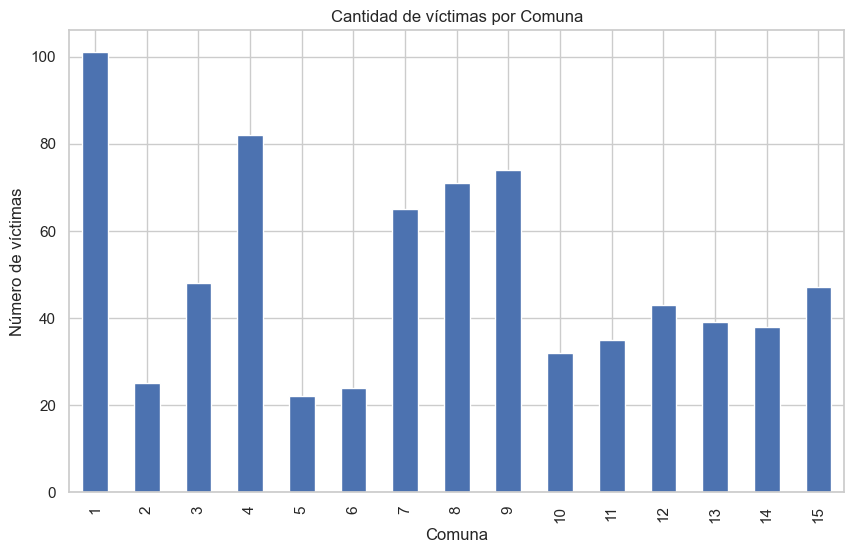

In [12]:
# Creamos el primer gráfico: N_VICTIMAS por COMUNA
plt.figure(figsize=(10,6))
Update_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Comuna')
plt.ylabel('Número de víctimas')
plt.title('Cantidad de víctimas por Comuna')
plt.show()

Resultados de KPI1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior .

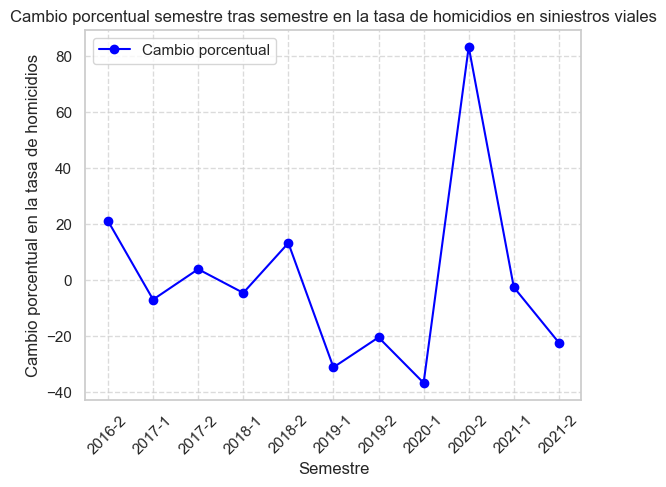

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
Update_homicidios = pd.read_csv('Tasa_Total_homicidios.csv')

# Calcular el porcentaje de cambio semestre tras semestre
Update_homicidios['PORCENTAJE_CAMBIO'] = Update_homicidios['tasa'].pct_change() * 100

# Crear un gráfico de líneas para visualizar el cambio porcentual
plt.plot(Update_homicidios['AÑO'].astype(str) + '-' + Update_homicidios['SEMESTRE'].astype(str), Update_homicidios['PORCENTAJE_CAMBIO'], marker='o', linestyle='-', color='blue', label='Cambio porcentual')

# Agregar cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Semestre')
plt.ylabel('Cambio porcentual en la tasa de homicidios')
plt.title('Cambio porcentual semestre tras semestre en la tasa de homicidios en siniestros viales')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Resultados del KPI2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior .

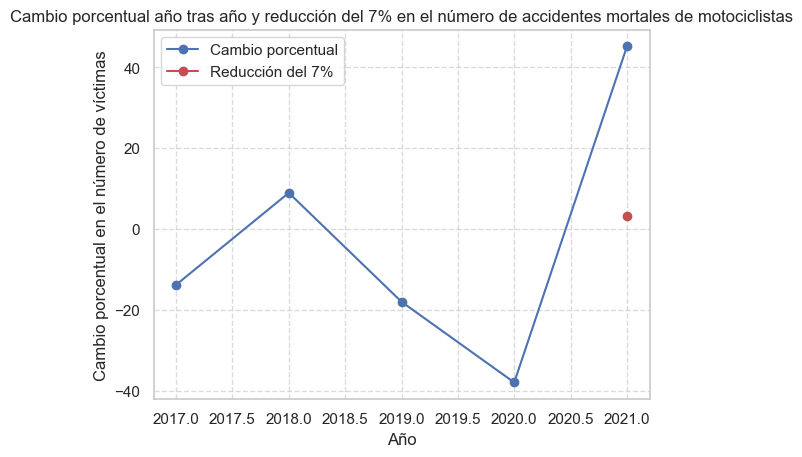

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
Update_homicidios = pd.read_csv('Tasa_Total_homicidios_moto.csv')

# Calcular el porcentaje de cambio año tras año en el número de víctimas de accidentes mortales de motociclistas
Update_homicidios['PORCENTAJE_CAMBIO'] = Update_homicidios['N_VICTIMAS'].pct_change() * 100

# Obtener el último año en el conjunto de datos
ultimo_anio = Update_homicidios['AÑO'].max()

# Calcular la reducción del 7% para el último año
Update_homicidios['REDUCCION_7_PORCIENTO'] = Update_homicidios.loc[Update_homicidios['AÑO'] == ultimo_anio, 'N_VICTIMAS'] * 0.07

# Crear un gráfico de línea para visualizar el cambio porcentual y la reducción del 7%
plt.plot(Update_homicidios['AÑO'], Update_homicidios['PORCENTAJE_CAMBIO'], marker='o', label='Cambio porcentual')
plt.plot(Update_homicidios['AÑO'], Update_homicidios['REDUCCION_7_PORCIENTO'], marker='o', linestyle='-', color='r', label='Reducción del 7%')

# Agregar cuadrícula de fondo
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Año')
plt.ylabel('Cambio porcentual en el número de víctimas')
plt.title('Cambio porcentual año tras año y reducción del 7% en el número de accidentes mortales de motociclistas')
plt.legend()
plt.show()
